In [3]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats


import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']  # or svg
%matplotlib inline

sns.set(context='notebook', style='whitegrid', font_scale=1.2)

In [208]:
import pickle

In [209]:
!pip install genderize
from genderize import Genderize as gender

In [4]:
df = pd.read_csv('/Users/gabriellanemeth/Documents/METIS/Reg_course_project_local/movies_dataframe.csv', index_col = "Title")

In [178]:
df.head(3)

,domestic_gross,international_gross,running_time,release_date,MPAA,distributor,in_release_days,genres,budget,director,...,genres_thriller,genres_romance,peak_season_rel,G,NC-17,Not Rated,PG,PG-13,R,is_director_female_?
Title,,,,,,,,,,,,,,,,,,,,,
Harry Potter and the Sorcerer's Stone,317575550,657179821,152.0,2001-11-16,PG,Warner Bros.,411,"['Adventure', 'Family', 'Fantasy']",125000000.0,Chris Columbus,...,0,0,1,0,0,0,1,0,0,0
The Lord of the Rings: The Fellowship of the Ring,166000,326266,178.0,2021-02-05,PG-13,New Line Cinema,121,"['Action', 'Adventure', 'Drama', 'Fantasy']",93000000.0,Peter Jackson,...,0,0,0,0,0,0,0,1,0,0
Shrek,267665011,216744207,90.0,2001-05-16,PG,DreamWorks Distribution,233,"['Adventure', 'Animation', 'Comedy', 'Family',...",60000000.0,Vicky Jenson,...,0,0,1,0,0,0,1,0,0,1


In [116]:
top_distributors = df.distributor.value_counts().head(7)

In [117]:
def top_dist(text):
    if text in top_distributors:
        return 1
    else:
        return 0

In [118]:
df['top_distributor'] = df['distributor'].apply(top_dist)

In [119]:
genres_types_list = (df['genres'].str.cat(sep=' ')).replace('[','').replace(']','').replace("'",'').replace(",",'')

genres_types_unique = list(set(genres_types_list.split()))

In [120]:
genres_types_list = genres_types_list.split()

In [121]:
from collections import Counter

In [122]:
Counter(genres_types_list)

Counter({'Adventure': 832,
         'Family': 533,
         'Fantasy': 569,
         'Action': 1039,
         'Drama': 2087,
         'Animation': 281,
         'Comedy': 1593,
         'Crime': 668,
         'Thriller': 1119,
         'History': 213,
         'Romance': 912,
         'War': 161,
         'Sci-Fi': 479,
         'Biography': 376,
         'Mystery': 466,
         'Horror': 402,
         'Music': 200,
         'Sport': 172,
         'Musical': 104,
         'Documentary': 197,
         'Short': 21,
         'Western': 44,
         '0': 8,
         'News': 3,
         'Talk-Show': 1})

In [123]:
top_genres = ['Action','Drama','Comedy','Thriller','Romance']

In [124]:
def genres_action(text):
    if "Action" in text:
        return 1
    else:
        return 0

In [125]:
def genres_drama(text):
    if 'Drama' in text:
        return 1
    else:
        return 0

In [126]:
def genres_comedy(text):
    if 'Comedy' in text:
        return 1
    else:
        return 0

In [127]:
def genres_thriller(text):
    if 'Thriller' in text:
        return 1
    else:
        return 0

In [128]:
def genres_romance(text):
    if 'Romance' in text:
        return 1
    else:
        return 0

In [129]:
df['genres_action'] = df['genres'].apply(genres_action)

In [130]:
df['genres_drama'] = df['genres'].apply(genres_drama)

In [131]:
df['genres_comedy'] = df['genres'].apply(genres_comedy)

In [132]:
df['genres_thriller'] = df['genres'].apply(genres_thriller)

In [133]:
df['genres_romance'] = df['genres'].apply(genres_romance)

In [134]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [135]:
# Peak season in release dates are defined as "Oscar bait" from Oct to end of Dec, 
# and the summer 'blockbuster' period from May to end of July
# The 'Dump months' are Jan - February and Aug - Sept and we will add to it the 'average' months like Match, Apr

def peak_season_rel(date):
    peak_season = [10,11,12,5,6,7]
    off_peak_season = [1,2,3,4,8,9]
    if date.month in peak_season:
        return 1
    else:
        return 0

In [136]:
df['peak_season_rel'] = df['release_date'].apply(peak_season_rel)

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4071 entries, Harry Potter and the Sorcerer's Stone to Funhouse
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   domestic_gross       4071 non-null   int64         
 1   international_gross  4071 non-null   int64         
 2   running_time         3969 non-null   float64       
 3   release_date         3722 non-null   datetime64[ns]
 4   MPAA                 3694 non-null   object        
 5   distributor          3990 non-null   object        
 6   in_release_days      4071 non-null   int64         
 7   genres               4071 non-null   object        
 8   budget               2306 non-null   float64       
 9   director             4054 non-null   object        
 10  Op_weekend_gr        3995 non-null   float64       
 11  theatre              3995 non-null   float64       
 12  director_gender      4071 non-null   int64         
 13

In [138]:
df_dummies = pd.get_dummies(df['MPAA'])

In [139]:
df = df.join(df_dummies)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4071 entries, Harry Potter and the Sorcerer's Stone to Funhouse
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   domestic_gross       4071 non-null   int64         
 1   international_gross  4071 non-null   int64         
 2   running_time         3969 non-null   float64       
 3   release_date         3722 non-null   datetime64[ns]
 4   MPAA                 3694 non-null   object        
 5   distributor          3990 non-null   object        
 6   in_release_days      4071 non-null   int64         
 7   genres               4071 non-null   object        
 8   budget               2306 non-null   float64       
 9   director             4054 non-null   object        
 10  Op_weekend_gr        3995 non-null   float64       
 11  theatre              3995 non-null   float64       
 12  director_gender      4071 non-null   int64         
 13

# Handling missing values

In [141]:
df['running_time'] = df['running_time'].fillna(df['running_time'].mean())

In [142]:
df['theatre'] = df['theatre'].fillna(0)

In [143]:
df['Op_weekend_gr'] = df['Op_weekend_gr'].fillna(0)

In [92]:
df['budget'] = df['budget'].fillna(0)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4071 entries, Harry Potter and the Sorcerer's Stone to Funhouse
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   domestic_gross       4071 non-null   int64         
 1   international_gross  4071 non-null   int64         
 2   running_time         4071 non-null   float64       
 3   release_date         3722 non-null   datetime64[ns]
 4   MPAA                 3694 non-null   object        
 5   distributor          3990 non-null   object        
 6   in_release_days      4071 non-null   int64         
 7   genres               4071 non-null   object        
 8   budget               2306 non-null   float64       
 9   director             4054 non-null   object        
 10  Op_weekend_gr        4071 non-null   float64       
 11  theatre              4071 non-null   float64       
 12  director_gender      4071 non-null   int64         
 13

In [145]:
def get_genders(list_of_names):
    '''Input a list of names and output the most likely gender.
       Turn your column of director names into a list and use this
       function to produce a new column of genders that is one-hot-encoded
       (aka 1 for female 0 for male).
    '''
    #Get first names
    first_names = [name.split()[0] for name in list_of_names]
    #Use API to get dictionaries
    name_dictionaries = gender().get(first_names)
    #Get genders
    genders = [name['gender'] for name in name_dictionaries]
    #Encode genders
    binary_encoder = {'male': 0, 'female': 1}
    binary_genders = [binary_encoder[gender] for gender in genders]
    return binary_genders


In [146]:
#Test it here
names_list = ['Donald Trump','Kamela Harris','Joe Biden', 'Hillary Clinton']
get_genders(names_list)

[0, 1, 0, 1]

In [147]:
df['director'] = df['director'].fillna('0')

In [153]:
director_names = list(set(df['director']))

In [ ]:
def fix_names(text):
    if text == 0

In [167]:
with open('df_for_Lew', 'wb') as dump_var:
    pickle.dump(df, dump_var)

In [171]:
pickle_in = open('added_female_dummy_column.pickle', 'rb')
df = pickle.load(pickle_in)

In [175]:
df.columns

Index(['domestic_gross', 'international_gross', 'running_time', 'release_date',
       'MPAA', 'distributor', 'in_release_days', 'genres', 'budget',
       'director', 'Op_weekend_gr', 'theatre', 'director_gender',
       'total_gross', 'top_distributor', 'genres_action', 'genres_drama',
       'genres_comedy', 'genres_thriller', 'genres_romance', 'peak_season_rel',
       'G', 'NC-17', 'Not Rated', 'PG', 'PG-13', 'R', 'is_director_female_?'],
      dtype='object')

In [176]:
df['is_director_female_?'].sum()

356

In [179]:
df.describe()

,domestic_gross,international_gross,running_time,in_release_days,budget,Op_weekend_gr,theatre,director_gender,total_gross,top_distributor,...,genres_thriller,genres_romance,peak_season_rel,G,NC-17,Not Rated,PG,PG-13,R,is_director_female_?
count,4.071000e+03,4.071000e+03,4071.000000,4071.000000,2.306000e+03,4.071000e+03,4071.000000,4071.000000,4.071000e+03,4071.000000,...,4071.000000,4071.000000,4071.000000,4071.000000,4071.000000,4071.000000,4071.000000,4071.000000,4071.000000,4071.000000
mean,4.506486e+07,6.154218e+07,108.541446,283.140506,5.240932e+07,1.332366e+07,1757.741096,0.054286,1.066070e+08,0.482682,...,0.274871,0.224024,0.437239,0.012036,0.001228,0.000491,0.147384,0.372636,0.373618,0.087448
std,7.029196e+07,1.267368e+08,19.009835,238.872594,5.091114e+07,2.283669e+07,1425.067903,0.226610,1.898405e+08,0.499761,...,0.446504,0.416989,0.496106,0.109061,0.035028,0.022162,0.354532,0.483566,0.483823,0.282525
min,5.070000e+02,0.000000e+00,61.000000,0.000000,1.500000e+04,0.000000e+00,0.000000,0.000000,7.500000e+02,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.569430e+06,2.230350e+06,95.500000,166.000000,1.800000e+07,3.309440e+05,54.500000,0.000000,1.067362e+07,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.021892e+07,1.573670e+07,106.000000,270.000000,3.500000e+07,5.963324e+06,2072.000000,0.000000,3.915685e+07,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.460964e+07,5.750927e+07,117.000000,372.000000,7.000000e+07,1.637914e+07,3005.000000,0.000000,1.133213e+08,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,9.366622e+08,1.939128e+09,342.000000,6832.000000,3.560000e+08,3.571150e+08,4725.000000,1.000000,2.797501e+09,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='domestic_gross'>

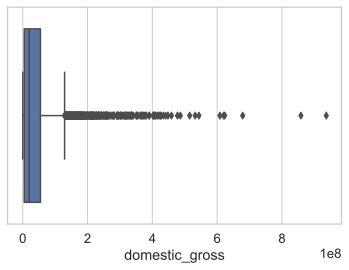

In [184]:
sns.boxplot(x = df['domestic_gross'])

<AxesSubplot:xlabel='total_gross'>

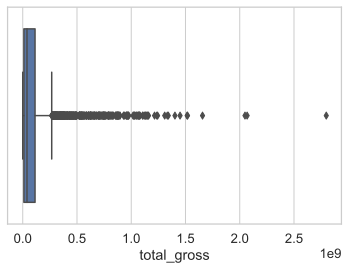

In [185]:
sns.boxplot(x = df['total_gross'])

In [188]:
# As we can see we have some outliers on the total gross

df[df['total_gross']>2000000000]

,domestic_gross,international_gross,running_time,release_date,MPAA,distributor,in_release_days,genres,budget,director,...,genres_thriller,genres_romance,peak_season_rel,G,NC-17,Not Rated,PG,PG-13,R,is_director_female_?
Title,,,,,,,,,,,,,,,,,,,,,
Star Wars: Episode VII - The Force Awakens,936662225,1131561399,138.0,2015-12-18,PG-13,Walt Disney Studios Motion Pictures,380,"['Action', 'Adventure', 'Sci-Fi']",245000000.0,J.J. Abrams,...,0,0,1,0,0,0,0,1,0,0
Avengers: Infinity War,678815482,1369544272,149.0,2018-04-27,PG-13,Walt Disney Studios Motion Pictures,249,"['Action', 'Adventure', 'Sci-Fi']",NaN,Joe Russo,...,0,0,0,0,0,0,0,1,0,0
Avengers: Endgame,858373000,1939128328,181.0,2019-04-26,PG-13,Walt Disney Studios Motion Pictures,250,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",356000000.0,Joe Russo,...,0,0,0,0,0,0,0,1,0,0


In [190]:
df.shape

(4071, 28)

In [192]:
df = df.loc[df['total_gross'] < 2000000000,:]

In [193]:
df.shape

(4068, 28)

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4068 entries, Harry Potter and the Sorcerer's Stone to Funhouse
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   domestic_gross        4068 non-null   int64         
 1   international_gross   4068 non-null   int64         
 2   running_time          4068 non-null   float64       
 3   release_date          3719 non-null   datetime64[ns]
 4   MPAA                  3691 non-null   object        
 5   distributor           3987 non-null   object        
 6   in_release_days       4068 non-null   int64         
 7   genres                4068 non-null   object        
 8   budget                2304 non-null   float64       
 9   director              4068 non-null   object        
 10  Op_weekend_gr         4068 non-null   float64       
 11  theatre               4068 non-null   float64       
 12  director_gender       4068 non-null   int

In [ ]:
# Now we will find he best way to handle missing data on Budget column. 

In [197]:
df.corr()

,domestic_gross,international_gross,running_time,in_release_days,budget,Op_weekend_gr,theatre,director_gender,total_gross,top_distributor,...,genres_thriller,genres_romance,peak_season_rel,G,NC-17,Not Rated,PG,PG-13,R,is_director_female_?
domestic_gross,1.000000,0.831627,0.187437,0.046475,0.640797,0.931296,0.601452,-0.052024,0.928432,0.384284,...,-0.015955,-0.098862,0.177718,0.023282,-0.021368,-0.013788,0.131027,0.154670,-0.160533,-0.066335
international_gross,0.831627,1.000000,0.237437,0.026872,0.717735,0.810519,0.475776,-0.050915,0.978417,0.302152,...,0.007472,-0.099669,0.187873,0.020934,-0.009310,-0.006955,0.111429,0.121912,-0.162526,-0.045443
running_time,0.187437,0.237437,1.000000,0.038053,0.352799,0.161314,-0.031160,0.003419,0.228583,0.034976,...,0.034454,0.041498,0.083990,-0.095375,0.016652,0.057882,-0.170799,0.044908,0.005154,-0.019172
in_release_days,0.046475,0.026872,0.038053,1.000000,0.011509,-0.015955,-0.085505,0.044555,0.035270,0.002305,...,-0.061748,-0.026529,-0.016669,0.121454,0.017981,-0.004514,0.009268,-0.031705,-0.055088,-0.015945
budget,0.640797,0.717735,0.352799,0.011509,1.000000,0.658938,0.516196,-0.091778,0.717412,0.336365,...,-0.052892,-0.152824,0.263099,0.044228,-0.029053,NaN,0.132418,0.184411,-0.290551,-0.079101
Op_weekend_gr,0.931296,0.810519,0.161314,-0.015955,0.658938,1.000000,0.658785,-0.067977,0.888747,0.389870,...,0.025238,-0.114273,0.175668,0.016111,-0.021093,-0.012202,0.090700,0.179574,-0.155751,-0.074304
theatre,0.601452,0.475776,-0.031160,-0.085505,0.516196,0.658785,1.000000,-0.083684,0.542079,0.576834,...,0.132830,-0.120373,0.130698,0.006908,-0.043153,-0.022439,0.194818,0.202014,-0.162406,-0.110569
director_gender,-0.052024,-0.050915,0.003419,0.044555,-0.091778,-0.067977,-0.083684,1.000000,-0.053419,-0.042515,...,-0.089354,0.094800,-0.010159,-0.026465,-0.008408,-0.005316,0.013470,0.015144,-0.005896,0.685680
total_gross,0.928432,0.978417,0.228583,0.035270,0.717412,0.888747,0.542079,-0.053419,1.000000,0.345122,...,-0.000938,-0.103462,0.191810,0.022667,-0.014179,-0.009783,0.123298,0.139108,-0.168459,-0.055083
top_distributor,0.384284,0.302152,0.034976,0.002305,0.336365,0.389870,0.576834,-0.042515,0.345122,1.000000,...,0.051013,-0.059993,0.101143,0.055772,-0.033860,-0.021407,0.118784,0.146345,-0.121585,-0.083039


In [250]:
smaller_df = df.loc[:,['total_gross', 'running_time', 'in_release_days', 'budget',
        'theatre', 'top_distributor', 'genres_action', 'genres_drama',
       'genres_comedy', 'genres_thriller', 'genres_romance', 'peak_season_rel',
       'G', 'NC-17', 'Not Rated', 'PG', 'PG-13', 'R', 'is_director_female_?']]

# Test 1 - budget missing value - median

In [251]:
df_test1 = smaller_df.copy()

In [ ]:
# in test 1 we will check what are our model figures if we fill missing data with median in the budget column

In [252]:
df_test1['budget'] = df_test1['budget'].fillna(df_test1['budget'].median())

In [253]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4068 entries, Harry Potter and the Sorcerer's Stone to Funhouse
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_gross           4068 non-null   int64  
 1   running_time          4068 non-null   float64
 2   in_release_days       4068 non-null   int64  
 3   budget                4068 non-null   float64
 4   theatre               4068 non-null   float64
 5   top_distributor       4068 non-null   int64  
 6   genres_action         4068 non-null   int64  
 7   genres_drama          4068 non-null   int64  
 8   genres_comedy         4068 non-null   int64  
 9   genres_thriller       4068 non-null   int64  
 10  genres_romance        4068 non-null   int64  
 11  peak_season_rel       4068 non-null   int64  
 12  G                     4068 non-null   uint8  
 13  NC-17                 4068 non-null   uint8  
 14  Not Rated             4068 non-null  

In [255]:
df_test1.corr()

,total_gross,running_time,in_release_days,budget,theatre,top_distributor,genres_action,genres_drama,genres_comedy,genres_thriller,genres_romance,peak_season_rel,G,NC-17,Not Rated,PG,PG-13,R,is_director_female_?
total_gross,1.000000,0.228583,0.035270,0.675221,0.542079,0.345122,0.256567,-0.221652,-0.029406,-0.000938,-0.103462,0.191810,0.022667,-0.014179,-0.009783,0.123298,0.139108,-0.168459,-0.055083
running_time,0.228583,1.000000,0.038053,0.257049,-0.031160,0.034976,0.155860,0.262810,-0.263227,0.034454,0.041498,0.083990,-0.095375,0.016652,0.057882,-0.170799,0.044908,0.005154,-0.019172
in_release_days,0.035270,0.038053,1.000000,-0.003177,-0.085505,0.002305,-0.072537,-0.005333,-0.048300,-0.061748,-0.026529,-0.016669,0.121454,0.017981,-0.004514,0.009268,-0.031705,-0.055088,-0.015945
budget,0.675221,0.257049,-0.003177,1.000000,0.445844,0.319629,0.358941,-0.223384,-0.067376,-0.020445,-0.119859,0.211368,0.019884,-0.021434,-0.005559,0.114084,0.166305,-0.211836,-0.066622
theatre,0.542079,-0.031160,-0.085505,0.445844,1.000000,0.576834,0.310480,-0.367877,0.107368,0.132830,-0.120373,0.130698,0.006908,-0.043153,-0.022439,0.194818,0.202014,-0.162406,-0.110569
top_distributor,0.345122,0.034976,0.002305,0.319629,0.576834,1.000000,0.193467,-0.237276,0.083346,0.051013,-0.059993,0.101143,0.055772,-0.033860,-0.021407,0.118784,0.146345,-0.121585,-0.083039
genres_action,0.256567,0.155860,-0.072537,0.358941,0.310480,0.193467,1.000000,-0.231684,-0.188063,0.303276,-0.231700,0.026094,-0.054199,-0.020506,0.012489,-0.080836,0.117225,-0.036564,-0.091174
genres_drama,-0.221652,0.262810,-0.005333,-0.223384,-0.367877,-0.237276,-0.231684,1.000000,-0.215482,-0.019608,0.203235,-0.059724,-0.086228,0.034195,0.021619,-0.150718,-0.002394,0.151512,0.070397
genres_comedy,-0.029406,-0.263227,-0.048300,-0.067376,0.107368,0.083346,-0.188063,-0.215482,1.000000,-0.380286,0.223244,0.029804,0.031448,-0.028144,0.004926,0.179017,-0.036332,-0.073500,0.031354
genres_thriller,-0.000938,0.034454,-0.061748,-0.020445,0.132830,0.051013,0.303276,-0.019608,-0.380286,1.000000,-0.238739,-0.040346,-0.062971,-0.005898,-0.013662,-0.222067,0.007446,0.218009,-0.089467


In [249]:
#g = sns.pairplot(df_to_pairplot[:1000], kind='scatter')
#g.fig.set_size_inches(8,8)

In [259]:

#Separate our features from our target

X = df_test1.loc[:,['running_time', 'in_release_days', 'budget','theatre', 'top_distributor', 'genres_action', 'genres_drama',
                           'genres_comedy', 'genres_thriller', 'genres_romance', 'peak_season_rel','G', 'NC-17', 
                           'Not Rated', 'PG', 'PG-13', 'R', 'is_director_female_?']]

y = smaller_df['total_gross']

In [260]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4068 entries, Harry Potter and the Sorcerer's Stone to Funhouse
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   running_time          4068 non-null   float64
 1   in_release_days       4068 non-null   int64  
 2   budget                4068 non-null   float64
 3   theatre               4068 non-null   float64
 4   top_distributor       4068 non-null   int64  
 5   genres_action         4068 non-null   int64  
 6   genres_drama          4068 non-null   int64  
 7   genres_comedy         4068 non-null   int64  
 8   genres_thriller       4068 non-null   int64  
 9   genres_romance        4068 non-null   int64  
 10  peak_season_rel       4068 non-null   int64  
 11  G                     4068 non-null   uint8  
 12  NC-17                 4068 non-null   uint8  
 13  Not Rated             4068 non-null   uint8  
 14  PG                    4068 non-null  

In [247]:
def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # perform train/val split
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=42)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    
    # report results
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}')

In [261]:
split_and_validate(X, y)


Validation R^2 score was: 0.5708084044592872
Feature coefficient results: 

running_time : 1199410.01
in_release_days : 39459.11
budget : 2.28
theatre : 44290.77
top_distributor : -2737279.10
genres_action : -17382032.08
genres_drama : -12346007.31
genres_comedy : -8915888.63
genres_thriller : -11780753.24
genres_romance : -5962665.00
peak_season_rel : 14271434.44
G : 22331046.48
NC-17 : 45619308.75
Not Rated : -43918646.04
PG : 4889073.28
PG-13 : -1671607.23
R : -157299.03
is_director_female_? : 8977485.48


Not great, let's try if we drop the rows where budget wasn't available

# Test 2 - budget missing value - drop nan

In [262]:
df_test2 = smaller_df.copy()

In [264]:
df_test2 = df_test2[df_test2['budget'].notna()]

In [265]:
df_test2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2304 entries, Harry Potter and the Sorcerer's Stone to Remember the Titans
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_gross           2304 non-null   int64  
 1   running_time          2304 non-null   float64
 2   in_release_days       2304 non-null   int64  
 3   budget                2304 non-null   float64
 4   theatre               2304 non-null   float64
 5   top_distributor       2304 non-null   int64  
 6   genres_action         2304 non-null   int64  
 7   genres_drama          2304 non-null   int64  
 8   genres_comedy         2304 non-null   int64  
 9   genres_thriller       2304 non-null   int64  
 10  genres_romance        2304 non-null   int64  
 11  peak_season_rel       2304 non-null   int64  
 12  G                     2304 non-null   uint8  
 13  NC-17                 2304 non-null   uint8  
 14  Not Rated             2304

In [268]:

X = df_test2.loc[:,['running_time', 'in_release_days', 'budget','theatre', 'top_distributor', 'genres_action', 'genres_drama',
                           'genres_comedy', 'genres_thriller', 'genres_romance', 'peak_season_rel','G', 'NC-17', 
                           'Not Rated', 'PG', 'PG-13', 'R', 'is_director_female_?']]

y = df_test2['total_gross']

In [269]:
split_and_validate(X, y)


Validation R^2 score was: 0.549029048128809
Feature coefficient results: 

running_time : 1357324.20
in_release_days : 149847.58
budget : 2.31
theatre : 43307.11
top_distributor : -22938871.05
genres_action : -37669504.29
genres_drama : -21253903.67
genres_comedy : -17373697.36
genres_thriller : -10134240.09
genres_romance : -10282993.03
peak_season_rel : 11241896.69
G : -39251744.44
NC-17 : -3526679.29
Not Rated : 0.00
PG : -32897097.72
PG-13 : -29879696.15
R : -23881686.57
is_director_female_? : 24528134.48


# Test 3 - budget missing value - fill with 0

In [270]:
df_test3 = smaller_df.copy()

In [271]:
df_test3['budget'] = df_test3['budget'].fillna(0)

In [272]:
X = df_test3.loc[:,['running_time', 'in_release_days', 'budget','theatre', 'top_distributor', 'genres_action', 'genres_drama',
                           'genres_comedy', 'genres_thriller', 'genres_romance', 'peak_season_rel','G', 'NC-17', 
                           'Not Rated', 'PG', 'PG-13', 'R', 'is_director_female_?']]

y = smaller_df['total_gross']

In [273]:
split_and_validate(X, y)


Validation R^2 score was: 0.5600270642329527
Feature coefficient results: 

running_time : 1263447.81
in_release_days : 37342.30
budget : 1.92
theatre : 36236.40
top_distributor : -7963662.64
genres_action : -10967236.26
genres_drama : -15752472.99
genres_comedy : -11939182.23
genres_thriller : -15916691.18
genres_romance : -7848997.84
peak_season_rel : 16934757.86
G : 25372484.83
NC-17 : -3461310.85
Not Rated : -39704863.55
PG : -1900074.73
PG-13 : -13661540.49
R : -19078741.92
is_director_female_? : 8412187.87


Test results (r2 scores):
     - median: 0.5708084044592872
     - drop rows: 0.549029048128809
     - fill with 0: 0.5600270642329527
     
The best result appeared when we used the median of the 'budget' column.

In [5]:
df['budget'] = df['budget'].fillna(df['budget'].median())

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4068 entries, Harry Potter and the Sorcerer's Stone to Funhouse
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   domestic_gross        4068 non-null   int64         
 1   international_gross   4068 non-null   int64         
 2   running_time          4068 non-null   float64       
 3   release_date          3719 non-null   datetime64[ns]
 4   MPAA                  3691 non-null   object        
 5   distributor           3987 non-null   object        
 6   in_release_days       4068 non-null   int64         
 7   genres                4068 non-null   object        
 8   budget                4068 non-null   float64       
 9   director              4068 non-null   object        
 10  Op_weekend_gr         4068 non-null   float64       
 11  theatre               4068 non-null   float64       
 12  director_gender       4068 non-null   int

Dataframe is ready for further analysis. See next steps in modelling file

In [278]:
df.to_csv (r'/Users/gabriellanemeth/Documents/METIS/Reg_course_project_local/movies_data_clean.csv', header=True)